In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

### Prepare dataset

In [23]:
X1, Y1 = make_classification(
    n_features=4, 
    n_redundant=0, 
    n_informative=4, 
    n_clusters_per_class=2, 
    n_classes=4
)

In [69]:
X1, Y1 = make_blobs(n_features=1, centers=6)

In [70]:
data = pd.DataFrame({"measure":np.array(X1).flatten(), "classes":Y1})
data

,measure,classes
0,2.531802,2
1,0.820724,2
2,-3.923122,1
3,-0.788670,3
4,-5.291381,1
...,...,...
95,2.121539,5
96,2.899948,5
97,-5.412629,1
98,3.332521,5


### Functions

<AxesSubplot:xlabel='classes', ylabel='measure'>

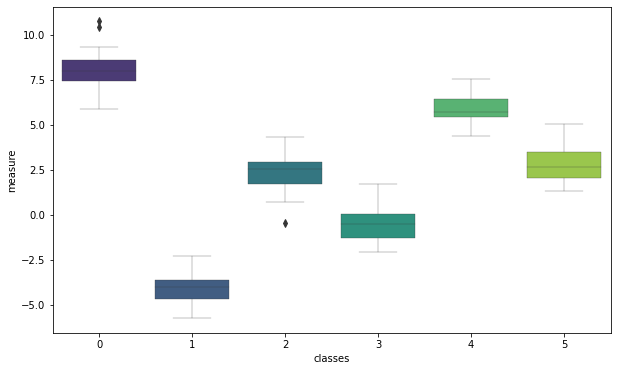

In [71]:
plt.figure(figsize=(10, 6))
#ln_classes = len(data["classes"].unique())
sns.boxplot(data=data,
            x="classes", 
            y="measure",  
            linewidth=0.3, 
            palette='viridis'
            )

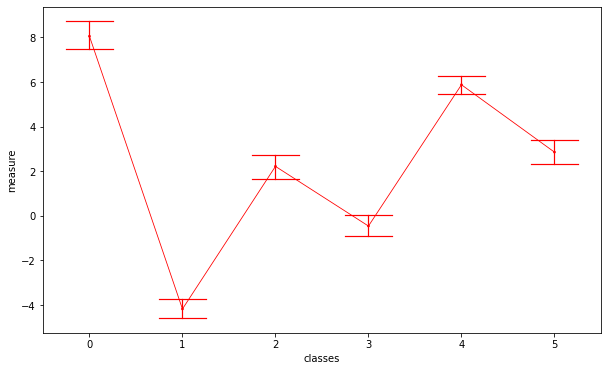

In [84]:
plt.figure(figsize=(10, 6))
ax = sns.pointplot(data=data,
                    x="classes", 
                    y="measure",  
                    scale=0.3, 
                    color='red', 
                    marker='',
                    linestyles='-',
                    errorbar=("se",2), #scaled standard error 
                    capsize=.5,
                    errwidth=1.2
                    )

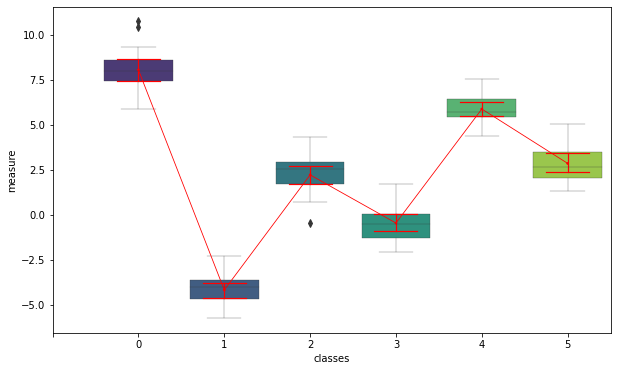

In [87]:
def boxplot_with_errorbar(data, x="classes", y="measure", errorbar=("se",2)):
    ### Plot a boxplot for each class
    plt.figure(figsize=(10, 6))
    ln_classes = len(data[x].unique())
    sns.boxplot(data=data,
                x=x, 
                y=y,  
                linewidth=0.3, 
                palette='viridis'
                )
    
    ### Plot a mean line (with error bar) for each class
    ax = sns.pointplot(data=data,
                        x=x, 
                        y=y,  
                        scale=0.3, 
                        color='red', 
                        marker='',
                        linestyles='-',
                        errorbar=errorbar,
                        capsize=.5,
                        errwidth=1.2
                        )

    ### This will limit the number of xticks displayed on the plot 
    plt.xticks(np.arange(-1, ln_classes, 1.0))
    plt.show()

boxplot_with_errorbar(data)